In [2]:
import sys
sys.path.append('../')
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd

%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from nonlocal_smms.core import scattering_matrix
from nonlocal_smms.plotting import color_map

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Figure 1

Here we calculate the normal incidence reflectance from an AlN/ GaN superlattice on a deep 4H-SiC substrate. The sample is illuminated at an angle of 65 degrees from normal incidence. The results are as follows:

1. Reflectance in the local case from a superlattice with layer thickness 1.5nm, for 20, 40, 60, 80 and 100 repetitions.
2. Reflectance in the local case from a 50 repetition superlatice with layer thicknesses 1.1, 1.3, 1.5, 1.7 and 1.9nm
3. Reflectance in the nonlocal case from a superlattice with layer thickness 1.5nm, for 20, 40, 60, 80 and 100 repetitions.
4. Reflectance in the nonlocal case from a 50 repetition superlatice with layer thicknesses 1.1, 1.3, 1.5, 1.7 and 1.9nm

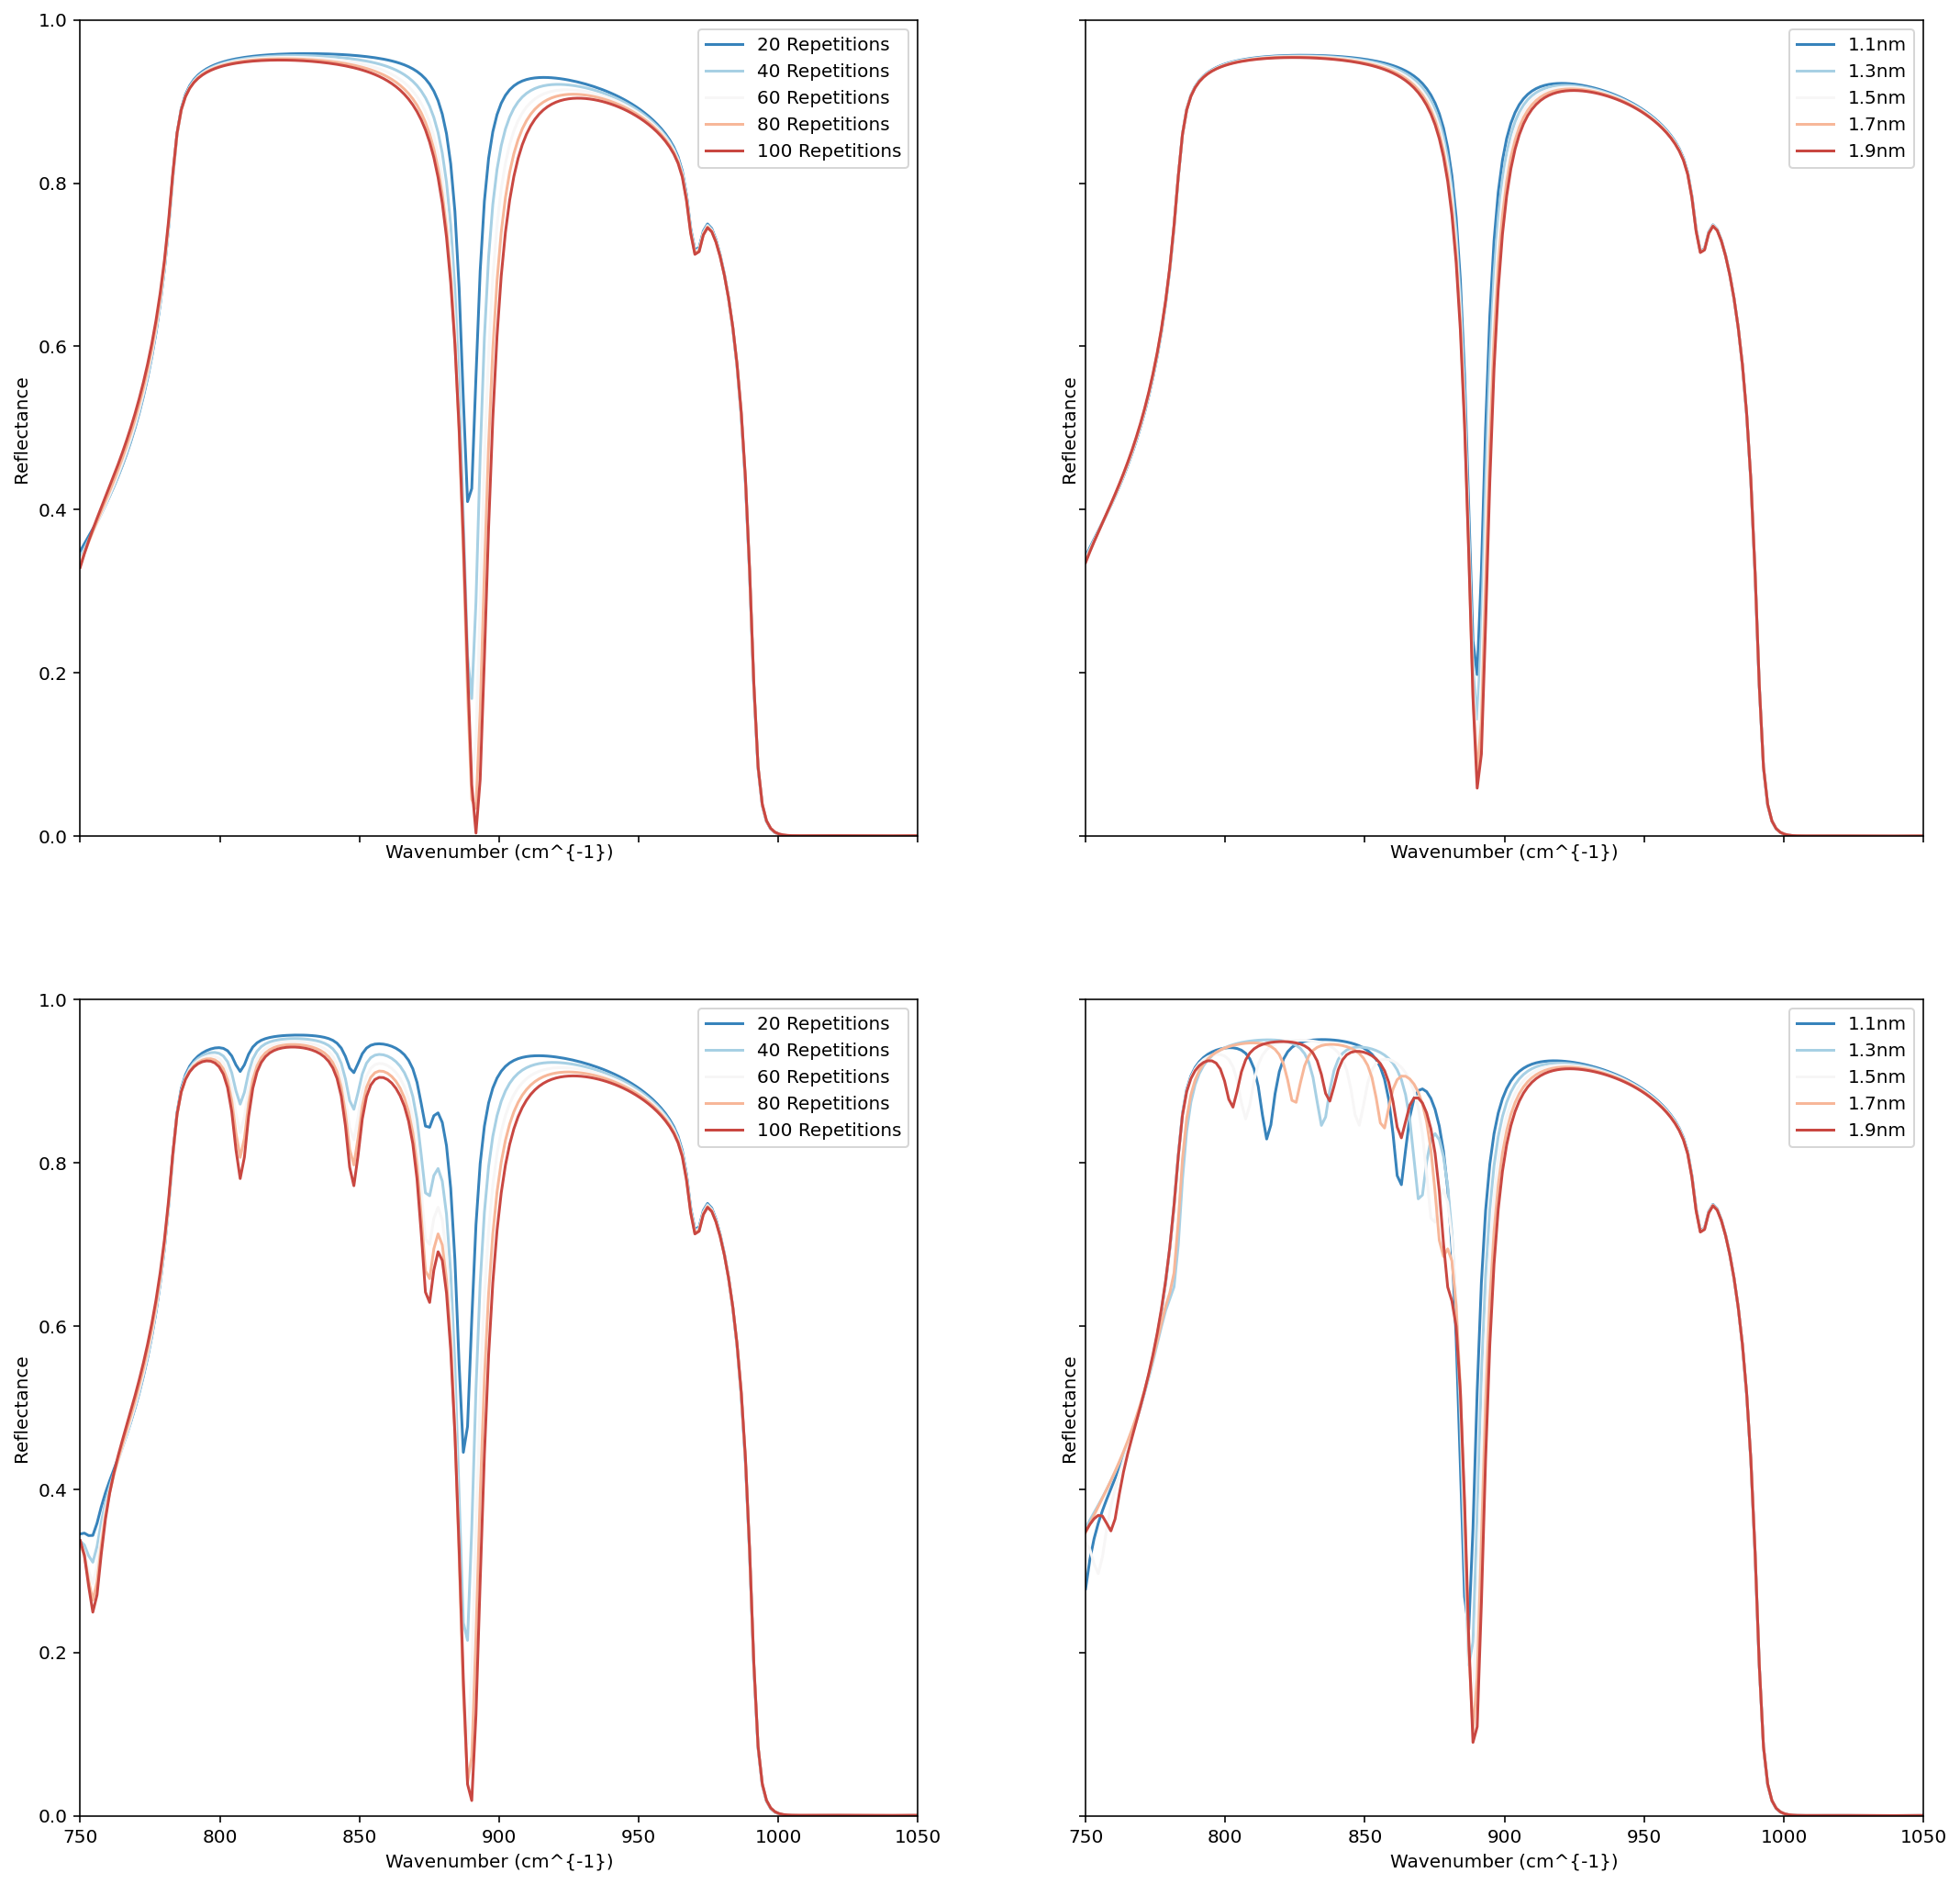

In [42]:
angle = 65  # set the angle of incidence
wavenumbers = np.linspace(750, 1050, 200) # Sets a wavenumber range to probe over

repetitions = np.linspace(20, 100, 5, dtype=int)  # defines the range of repetitions to probe for parts 1 and 3
thickness = 1.5  # sets the thickness for parts 1 and 3

thicknesses = np.linspace(1.1, 1.9, 5) # defines the range of thicknesses to probe for parts 2 and 4
repetition = 50  # sets the repetition for parts 2 and 4


colors = sns.color_palette("RdBu_r", 5)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(18, 18), nrows=2, ncols=2, sharex=True, sharey=True)

axes = [ax1, ax2, ax3, ax4]

# generate data for parts 1 and 3
for idx, rep in enumerate(repetitions):
    sublatticea = [['AlN', thickness* 1e-9], ['GaN', thickness * 1e-9]]
    heterostructure = sublatticea*rep
    heterostructure.insert(0, ['vacuum', 0])
    heterostructure.insert(len(heterostructure), ['SiC4H', 0])
    
    rte_loc, rtm_loc = scattering_matrix(
        wavenumbers,
        heterostructure,
        angle=angle,
        locality='local'
    )

    rte_nl, rtm_nl = scattering_matrix(
        wavenumbers,
        heterostructure,
        angle=angle
    )
    
    ax1.plot(wavenumbers, np.abs(rtm_loc) ** 2, label=f'{rep} Repetitions', color=colors[idx])
    ax3.plot(wavenumbers, np.abs(rtm_nl) ** 2, label=f'{rep} Repetitions', color=colors[idx])

# generate data for parts 1 and 3
for idx, thick in enumerate(thicknesses):
    sublatticea = [['AlN', thick * 1e-9], ['GaN', thick * 1e-9]]
    heterostructure = sublatticea*repetition
    heterostructure.insert(0, ['vacuum', 0])
    heterostructure.insert(len(heterostructure), ['SiC4H', 0])

    rte_loc, rtm_loc = scattering_matrix(
        wavenumbers,
        heterostructure,
        angle=angle,
        locality='local'
    )

    rte_nl, rtm_nl = scattering_matrix(
        wavenumbers,
        heterostructure,
        angle=angle
    )
    
    ax2.plot(wavenumbers, np.abs(rtm_loc) ** 2, label=f'{thick}nm', color=colors[idx])
    ax4.plot(wavenumbers, np.abs(rtm_nl) ** 2, label=f'{thick}nm', color=colors[idx])

for ax in axes:
    ax.set_xlabel('Wavenumber (cm^{-1})')
    ax.set_ylabel('Reflectance')
    ax.set_ylim(0, 1)
    ax.set_xlim(750, 1050)
    ax.legend(loc='upper right')

plt.show()

# Figure 2

Here we show reflectance maps for an AlN/ GaN superlattice on a deep 4H-SiC substrate as a function of the in-plane wavevector. By probing outside the light-line we are able to study the guided modes of the heterostructure. The heterostructure is parameterised by 50 repetitions and layer thickness 1nm. The results, from left to right, show

1. The reflectance in the local case.
2. The reflectance in the nonlocal case for longitudinal velocity $\beta_{\mathrm{L}} = 5.1 \times 10 ^5 \mathrm{cm / s}$
3. The reflectance in the nonlocal case for longitudinal velocity $\beta_{\mathrm{L}} = 15.3 \times 10 ^5 \mathrm{cm / s}$

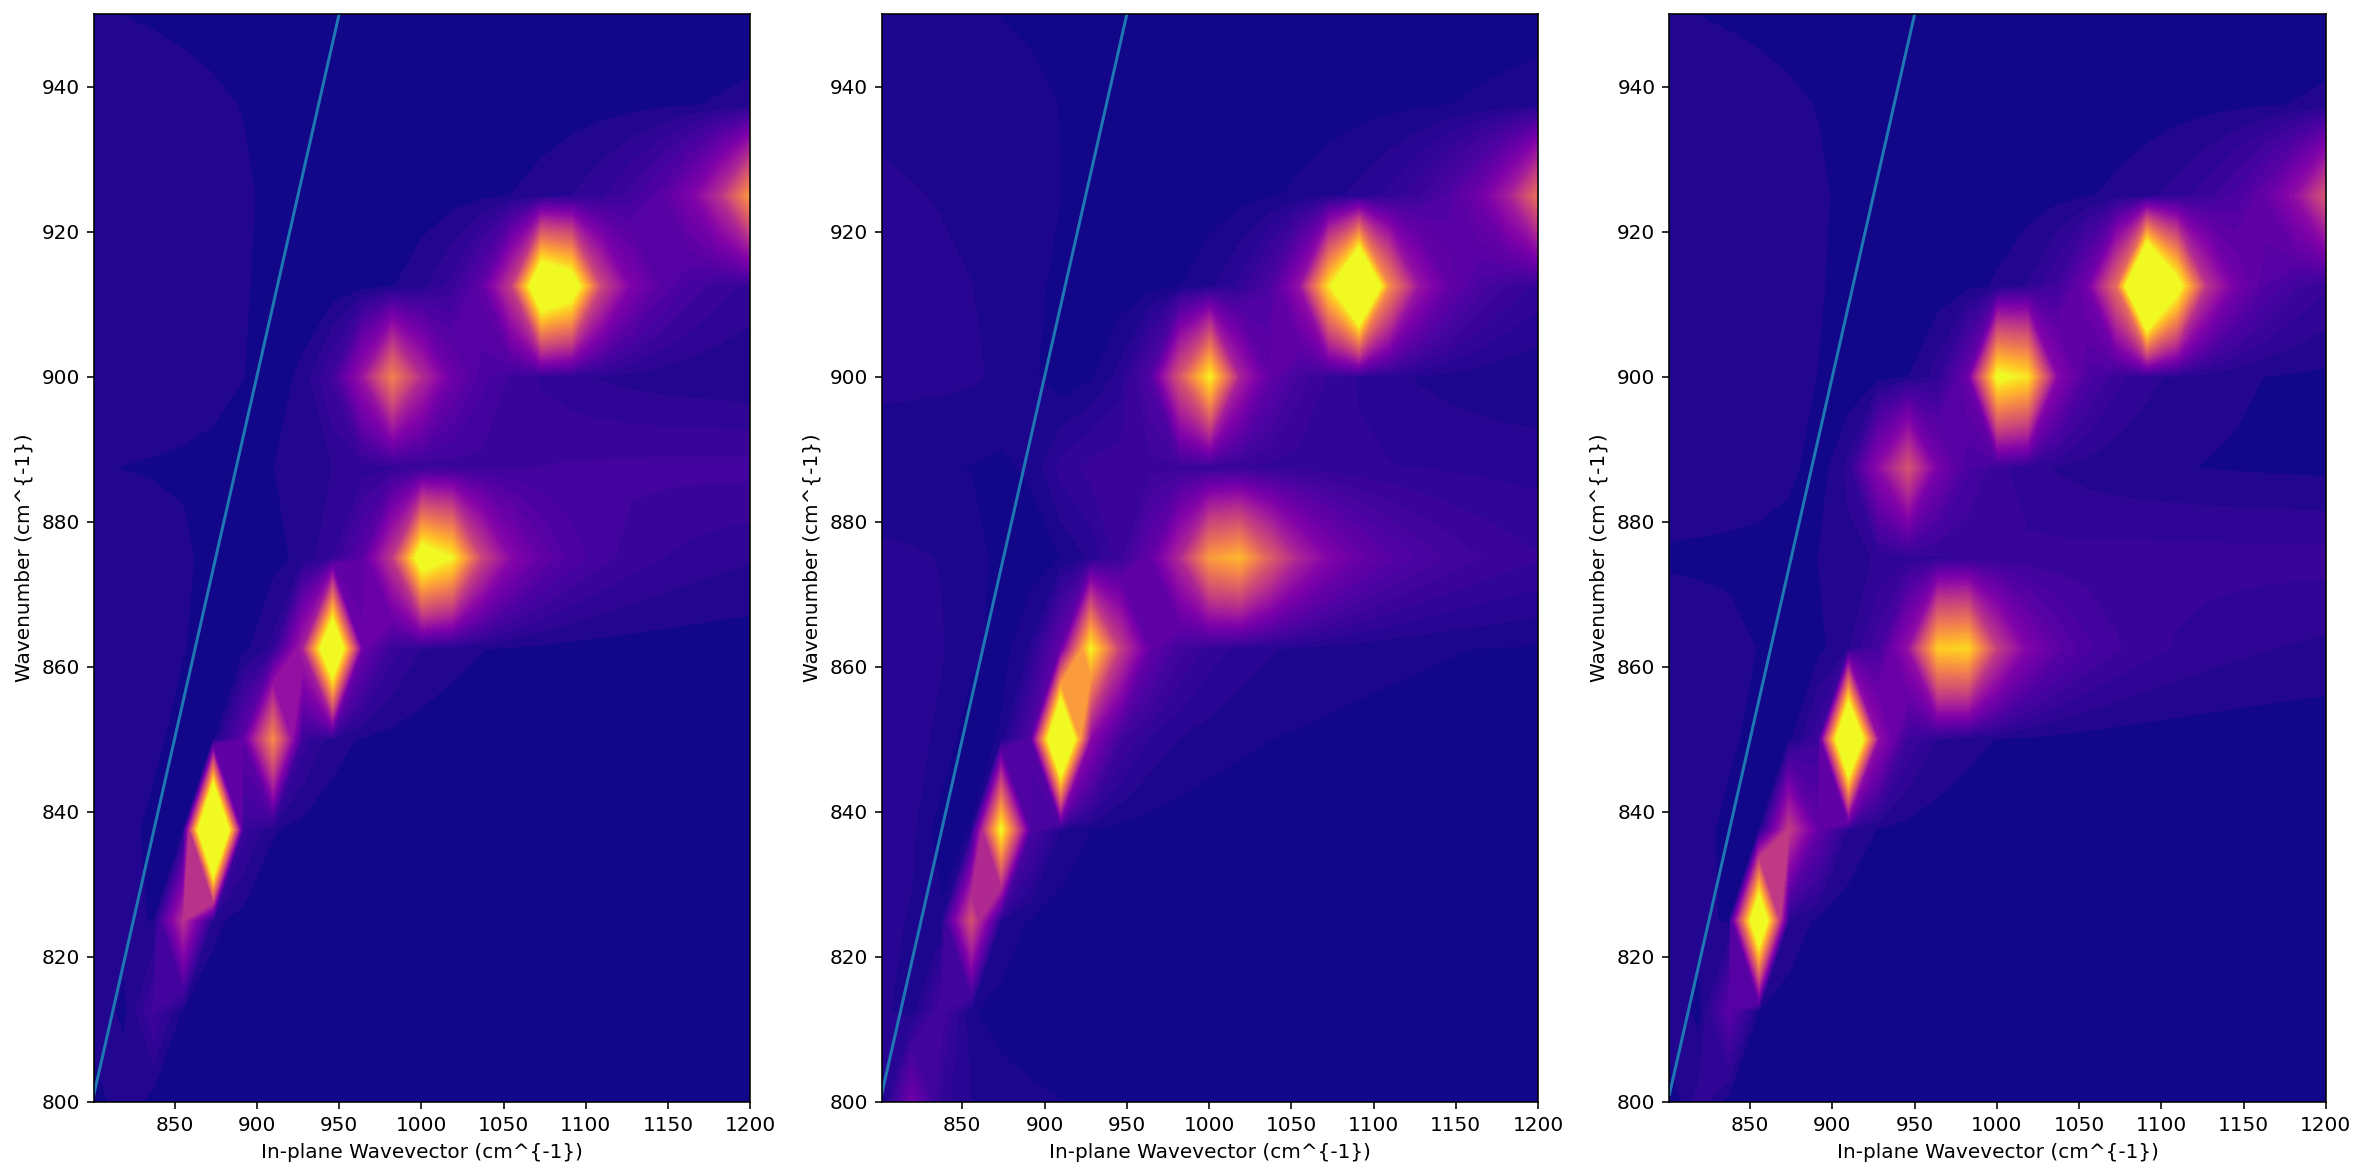

In [46]:
# accompanying map

wavevectors = np.linspace(801, 1200, 203)  # set the wavevector range
wavenumbers = np.linspace(800, 950, 153)  # set the wavenumber range


wavevectors = np.linspace(801, 1200, 23)  # set the wavevector range
wavenumbers = np.linspace(800, 950, 13)  # set the wavenumber range

repetition = 50
thickness = 1.0
sublatticea = [
    ['AlN', thickness * 1e-9], ['GaN', thickness * 1e-9]
]
heterostructure = sublatticea*repetition
heterostructure.insert(0, ['vacuum', 0])
heterostructure.insert(len(heterostructure), ['SiC4H', 0])

rte_loc, rtm_loc = scattering_matrix(
    wavenumbers,
    heterostructure,
    wavevector=wavevectors,
    locality='local',
)

rte_nloc_1, rtm_nloc_1 = scattering_matrix(
    wavenumbers,
    heterostructure,
    wavevector=wavevectors,
    locality='nonlocal',
)

new_params = {'AlN': {'beta_l': 3 * 1.7e-5}}  # update the nonlocal velocity, note this is in units beta_l / speed of light

rte_nloc_2, rtm_nloc_2 = scattering_matrix(
    wavenumbers,
    heterostructure,
    wavevector=wavevectors,
    locality='nonlocal',
    parameters = new_params
)

min_val = np.min((-np.imag(rtm_loc)))
max_val = np.max((-np.imag(rtm_loc)))/2
fig, axes = plt.subplots(figsize=(20, 10), ncols=3)

color_map(wavevectors, wavenumbers, (-np.imag(rtm_loc)), axes[0], lims=(min_val, max_val))
color_map(wavevectors, wavenumbers, (-np.imag(rtm_nloc_1)), axes[1], lims=(min_val, max_val))
color_map(wavevectors, wavenumbers, (-np.imag(rtm_nloc_2)), axes[2], lims=(min_val, max_val))

for ax in axes:
    ax.plot(wavevectors, wavevectors)
    ax.set_xlim(min(wavevectors), max(wavevectors))
    ax.set_ylim(min(wavenumbers), max(wavenumbers))
    ax.set_xlabel('In-plane Wavevector (cm^{-1})')
    ax.set_ylabel('Wavenumber (cm^{-1})')

plt.show()

# Figure 3

Here we compare the nonlocal response of two different AlN/ GaN sublattices with 50 repetitions. Sublattice 1 is parameterised by thickness 0.7nm and sublattice 2 by thickness 1nm. We also compare a new lattice, with a new sublattice containing both.

1. Reflectance at 65 degrees from the surface normal for sublattice 1, sublattice 2 and the full lattice.
2. Local reflectance map for the composite structure.
3. Nonlocal reflectance map for the composite structure.

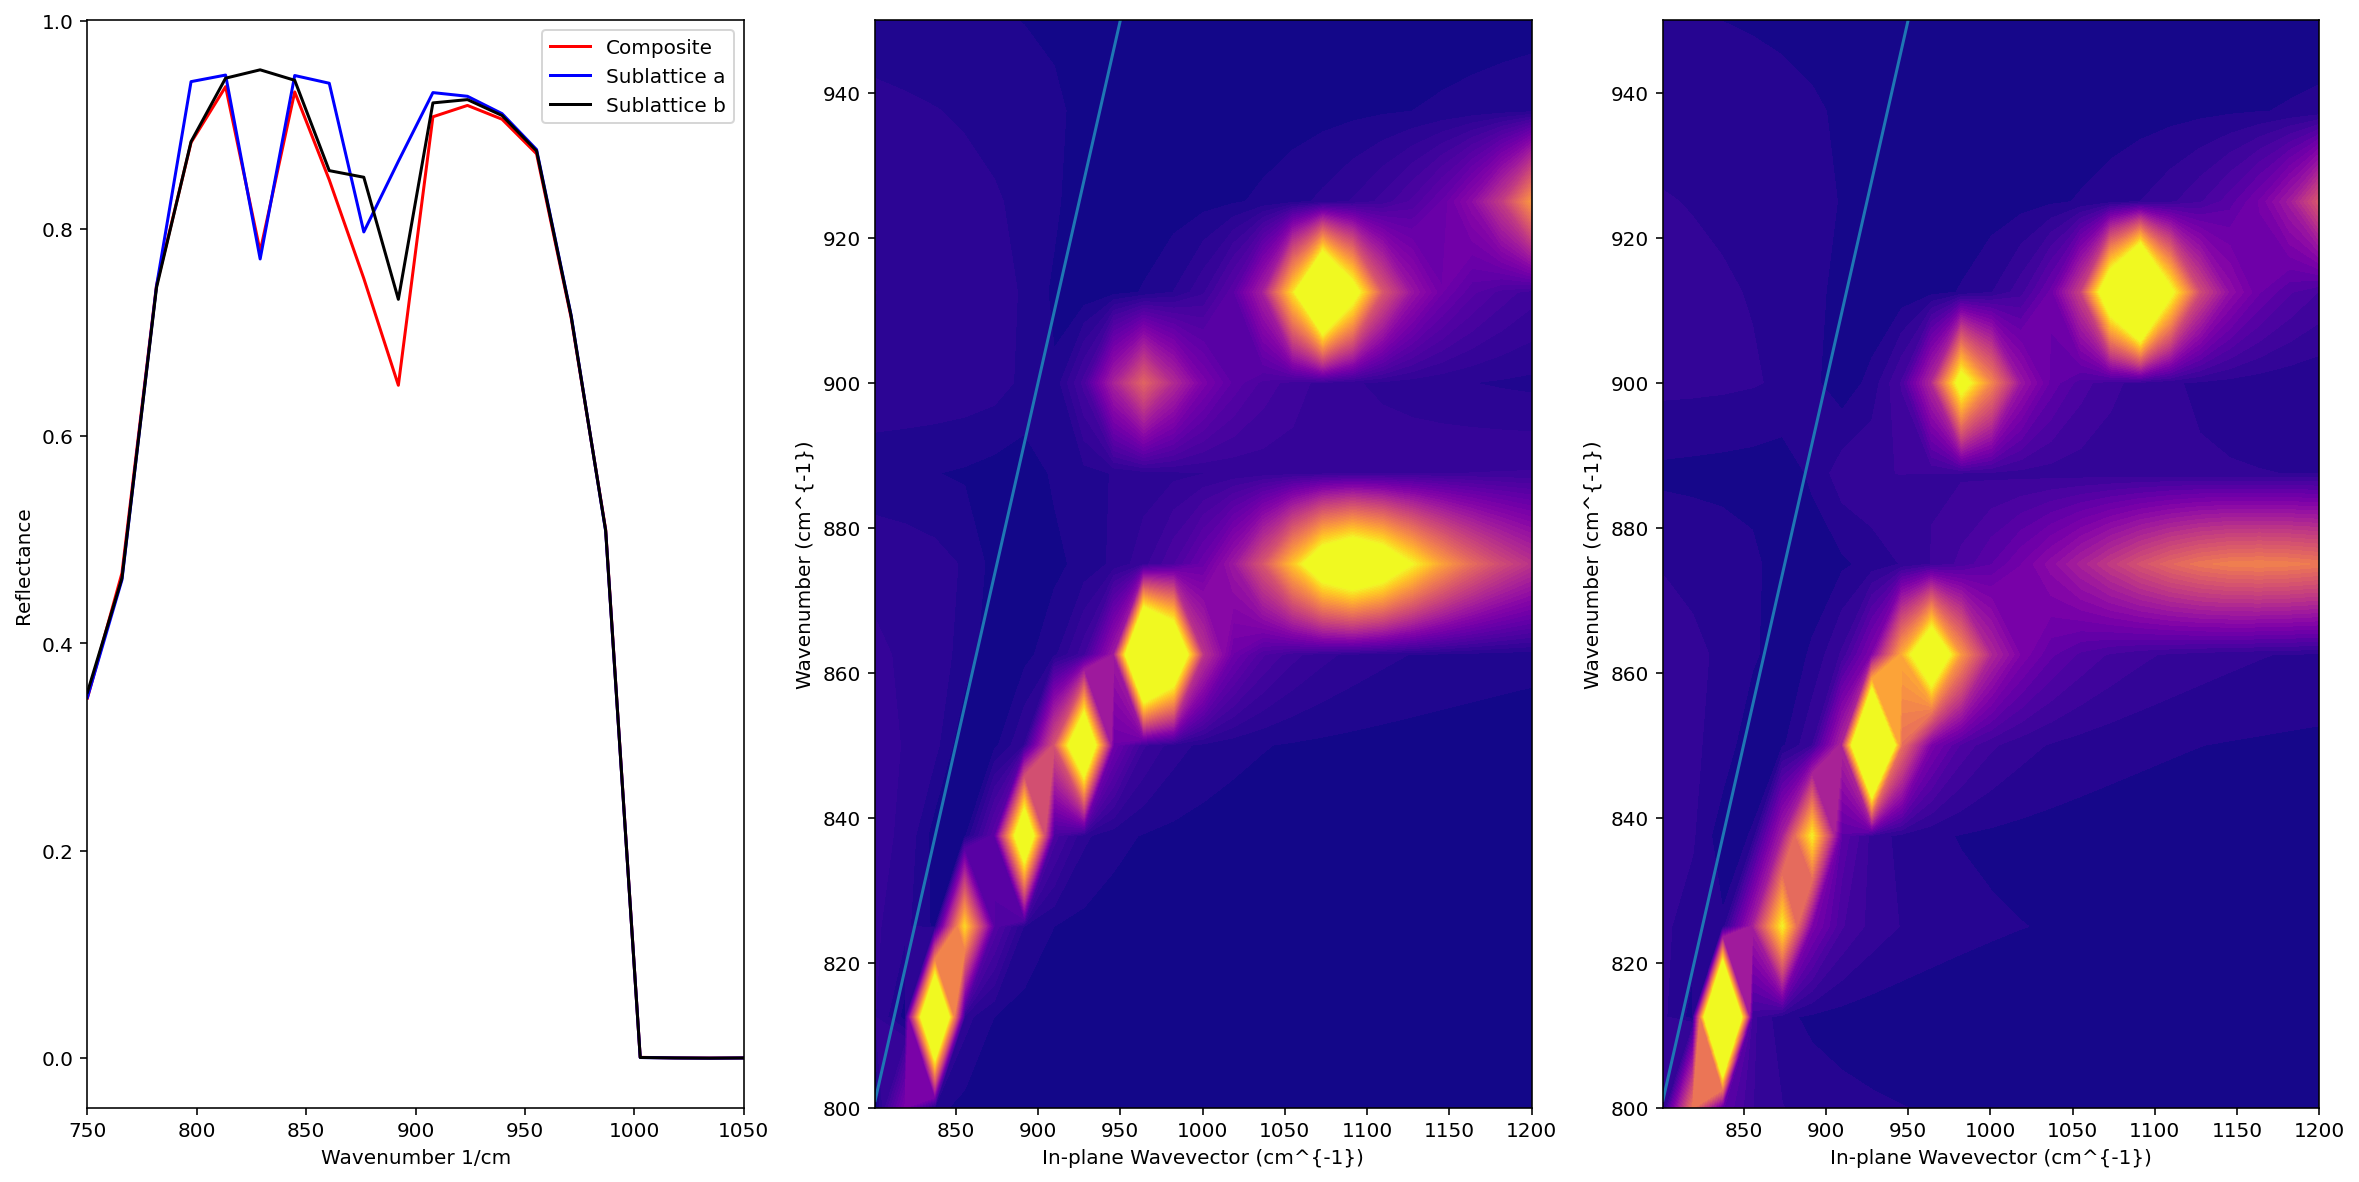

In [53]:
angle = 65  # angle for part 1

wavenumbers = np.linspace(750, 1050, 200)  # Sets a wavenumber range to probe over

thickness_a = 0.7
thickness_b = 1

# define the 3 heterostructures
repetitions = 50
sublattice_comp = [
    ['AlN', thickness_a * 1e-9], ['GaN', thickness_a * 1e-9],
    ['AlN', thickness_b * 1e-9], ['GaN', thickness_b * 1e-9],
]
heterostructure_comp = sublattice_comp*repetitions
heterostructure_comp.insert(0, ['vacuum', 0])
heterostructure_comp.insert(len(heterostructure_comp), ['SiC4H', 0])

sublattice_a = [
    ['AlN', thickness_a * 1e-9], ['GaN', thickness_a * 1e-9],
]
heterostructure_a = sublattice_a*repetitions
heterostructure_a.insert(0, ['vacuum', 0])
heterostructure_a.insert(len(heterostructure_a), ['SiC4H', 0])

sublattice_b = [
    ['AlN', thickness_b * 1e-9], ['GaN', thickness_b * 1e-9],
]
heterostructure_b = sublattice_b*repetitions
heterostructure_b.insert(0, ['vacuum', 0])
heterostructure_b.insert(len(heterostructure_b), ['SiC4H', 0])

rte_nl_comp, rtm_nl_comp = scattering_matrix(
    wavenumbers,
    heterostructure_comp,
    angle=angle
)
rte_nl_a, rtm_nl_a = scattering_matrix(
    wavenumbers,
    heterostructure_a,
    angle=angle
)
rte_nl_b, rtm_nl_b = scattering_matrix(
    wavenumbers,
    heterostructure_b,
    angle=angle
)

fig, ((ax1, ax2, ax3)) = plt.subplots(figsize=(20, 10), nrows=1, ncols=3)

ax1.plot(wavenumbers, np.abs(rtm_nl_comp)**2, 'r-', label="Composite")
ax1.plot(wavenumbers, np.abs(rtm_nl_a)**2, 'b-', label="Sublattice a")
ax1.plot(wavenumbers, np.abs(rtm_nl_b)**2, 'k-', label="Sublattice b")
ax1.set_xlim(min(wavenumbers),max(wavenumbers))
ax1.set_xlabel('Wavenumber 1/cm')
ax1.set_ylabel('Reflectance')
ax1.legend(loc='upper right')

# generate the maps

wavevectors = np.linspace(801, 1200, 203)
wavenumbers = np.linspace(800, 950, 153)

rte_loc, rtm_loc = scattering_matrix(
    wavenumbers,
    heterostructure_comp,
    wavevector=wavevectors,
    locality='local',
)

rte_nloc, rtm_nloc = scattering_matrix(
    wavenumbers,
    heterostructure_comp,
    wavevector=wavevectors,
    locality='nonlocal',
)

min_val = np.min((-np.imag(rtm_loc)))
max_val = np.max((-np.imag(rtm_loc)))/2

color_map(wavevectors, wavenumbers, (-np.imag(rtm_loc)), ax2, lims=(min_val, max_val))
color_map(wavevectors, wavenumbers, (-np.imag(rtm_nloc)), ax3, lims=(min_val, max_val))

for ax in [ax2, ax3]:
    ax.plot(wavevectors, wavevectors)
    ax.set_xlim(min(wavevectors), max(wavevectors))
    ax.set_ylim(min(wavenumbers), max(wavenumbers))
    ax.set_xlabel('In-plane Wavevector (cm^{-1})')
    ax.set_ylabel('Wavenumber (cm^{-1})')

plt.show()